In [1]:
import pandas as pd
import joblib
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/CTG.csv")
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, SimpleRNN,
                                     GRU, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D,
                                     Reshape, ZeroPadding1D, UpSampling1D,
                                     Conv2DTranspose, Conv2D, LeakyReLU, BatchNormalization, Add, Multiply,
                                     Embedding, Flatten, RepeatVector, Reshape, Softmax, Permute, ConvLSTM2D,
                                     BatchNormalization, Permute, LSTMCell, RNN, InputLayer)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset into a DataFrame (assuming it's in a CSV file)
df = pd.read_csv('data/CTG.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Define input features and target variable
X = df.drop(columns=['FileName', 'Date', 'SegFile', 'NSP'])
y = df['NSP']

# Convert labels to binary (0 and 1)
y = (y == 1).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape input data to match the expected input shape of the models
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define model names and corresponding model architectures
models = {
    "Feedforward Neural Network (FNN)": Sequential([
        Flatten(input_shape=(X_train.shape[1], 1)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    "Convolutional Neural Network (CNN)": Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    "Recurrent Neural Network (RNN)": Sequential([
        SimpleRNN(64, input_shape=(X_train.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ]),
    "Long Short-Term Memory (LSTM)": Sequential([
        LSTM(64, input_shape=(X_train.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ]),
    "Gated Recurrent Unit (GRU)": Sequential([
        GRU(64, input_shape=(X_train.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ]),
    
}

# Iterate through each model, train, and evaluate
for model_name, model in models.items():
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Implement early stopping to prevent overfitting
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=6, batch_size=32,
              validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model on the testing data
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f'{model_name} - Accuracy: {accuracy * 100:.2f}%')


Epoch 1/6
54/54 [==============================] - 4s 17ms/step - loss: 0.3687 - accuracy: 0.8735 - val_loss: 0.1139 - val_accuracy: 0.9836
Epoch 2/6
54/54 [==============================] - 0s 7ms/step - loss: 0.1258 - accuracy: 0.9653 - val_loss: 0.0703 - val_accuracy: 0.9836
Epoch 3/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0644 - accuracy: 0.9847 - val_loss: 0.0624 - val_accuracy: 0.9836
Epoch 4/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0462 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9836
Epoch 5/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0416 - accuracy: 0.9906 - val_loss: 0.0707 - val_accuracy: 0.9859
Epoch 6/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9882 - val_loss: 0.0801 - val_accuracy: 0.9789
Feedforward Neural Network (FNN) - Accuracy: 97.89%
Epoch 1/6
54/54 [==============================] - 4s 21ms/step - loss: 0.2135 - accuracy: 0.9253 - val_loss: 0.0

Epoch 1/6
54/54 [==============================] - 4s 18ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.1161 - val_accuracy: 0.9836
Epoch 2/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.1217 - val_accuracy: 0.9859
Epoch 3/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.1221 - val_accuracy: 0.9836
Epoch 4/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.1243 - val_accuracy: 0.9836
Epoch 5/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.1279 - val_accuracy: 0.9789
Epoch 6/6
54/54 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.1326 - val_accuracy: 0.9789
Epoch 1/6
54/54 [==============================] - 4s 21ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0771 - val_accuracy: 0.9859
Epoch 2/6
54/54 [========

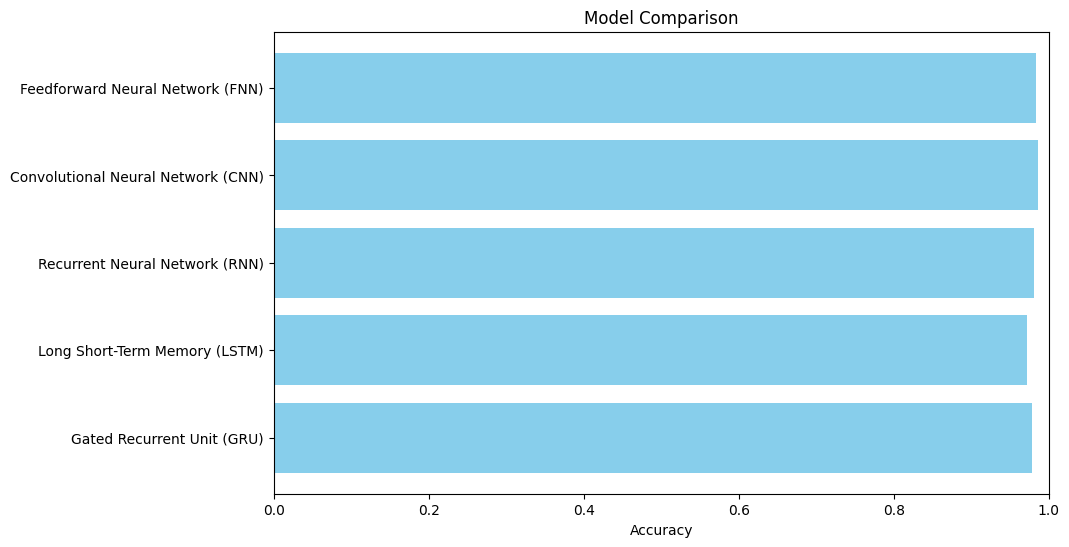

In [24]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
model_names = []
accuracies = []

# Iterate through each model, train, and evaluate
for model_name, model in models.items():
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Implement early stopping to prevent overfitting
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=6, batch_size=32,
              validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model on the testing data and store accuracy
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    model_names.append(model_name)
    accuracies.append(accuracy)

# Create a bar graph to compare accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1.0)  # Set the x-axis limit between 0 and 1
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest accuracy at the top
plt.show()
